# Relatório dos exercícios de PyROOT Introdução à Analise de Dados FAE
Silas Santos de Jesus

# Introdução:
    
Estes exercícios já foram resolvidos utilizando a linguagem ROOT, que pode ser encontrado neste repositório. Aqui resolveremos os mesmos exercícios utilizando a linguagem Python na paltaforma Jupyter notebook, onde o arquivo final terá formato .ipynb


# Começamos com o comando: "import ROOT", para importar as classes do ROOT.

# Estrutura básica dos comandos:

TFile abre o arquivo central que será usado, no caso usamos o "experiment.root"

'h = TH1F('h','test',100,-1.,1.)' cria o histograma, onde test é o título e onde o eixo x vai de -1 até 1. TH1F é adimensão do histograma.

"mychain = gDirectory.Get('tree1')" e "entries = mychain.GetEntriesFast()" #recupera as informações de interesse do diretório da tree.

"nb = mychain.GetEntry(jentry)
    if nb<=0:
        continue" #Copia a entrada de memoria e verifica
        
O comando ".Fill()" #preenche o histograma com as informações necessárias.

O comando:
"GetXaxis().SetTitle() e GetYaxis().SetTitle()" #Nomeio os eixos X e Y

E o comando: "Draw ()" #Desenha o histograma.



In [1]:
import ROOT
from ROOT import TFile, gDirectory, TH1D, TCanvas, TH1F, TH2F, TTree

Welcome to JupyROOT 6.22/02


In [2]:
myfile = TFile( 'experiment.root' )
mychain = gDirectory.Get( 'tree1' )
entries = mychain.GetEntriesFast()

# Exercício 1: Revise the script to draw the chi2 histogram with error bars.

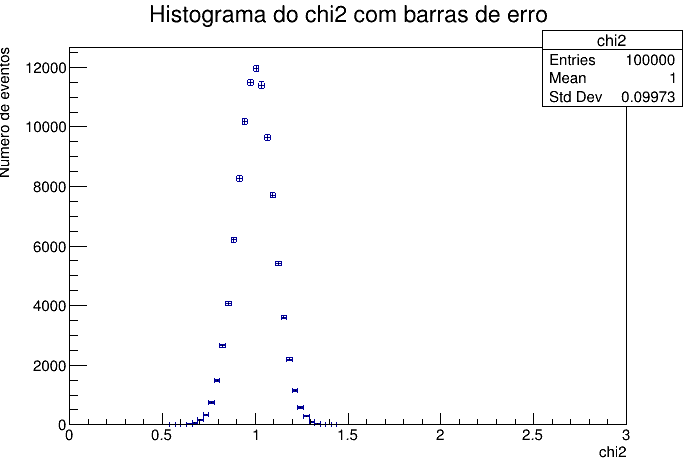

In [3]:
chi2Hist = TH1D("chi2","Histograma do chi2 com barras de erro", 100, 0, 3)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    chi2 = mychain.chi2
    chi2Hist.Fill(chi2)
    if nb <= 0:
        continue

canvas = TCanvas()
chi2Hist.GetXaxis().SetTitle("chi2")
chi2Hist.GetYaxis().SetTitle("Numero de eventos")
chi2Hist.Draw('BE1')
canvas.Draw()

# Exercício 2: Revise the scrip to create, fille and display an additional histogram of the variable ebeam(with error bars and axis labels).

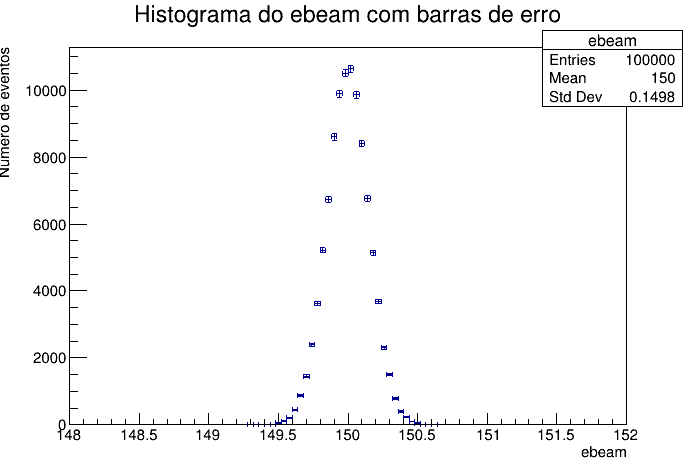

In [4]:
ebeamHist = TH1D("ebeam","Histograma do ebeam com barras de erro", 100, 148., 152.)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    ebeam = mychain.ebeam
    ebeamHist.Fill(ebeam)
    if nb <= 0:
        continue

canvas_ebeam = TCanvas()
ebeamHist.GetXaxis().SetTitle("ebeam")
ebeamHist.GetYaxis().SetTitle("Numero de eventos")
ebeamHist.Draw('BE1')
canvas_ebeam.Draw()

# Exercício 3: Fit the ebeam histogram to a gaussian distribution.

 FCN=37.5361 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=5.58032e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.06279e+04   4.11548e+01   1.01889e-01   7.33029e-08
   2  Mean         1.49999e+02   4.74808e-04   7.15253e-05   6.98955e-02
   3  Sigma        1.50095e-01   3.35427e-04   1.84321e-06   6.34704e-03


Warning in <TFile::Append>: Replacing existing TH1: ebeam (Potential memory leak).


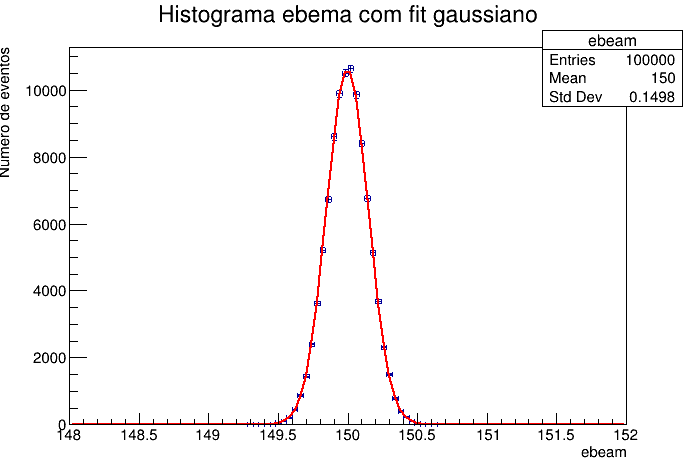

In [5]:
ebeamHistFIT = TH1F("ebeam","Histograma ebema com fit gaussiano", 100, 148., 152.)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    ebeam_fit = mychain.ebeam
    ebeamHistFIT.Fill(ebeam_fit)
    if nb <= 0:
        continue

canvas_ebeam_fit = TCanvas()
ebeamHistFIT.GetXaxis().SetTitle("ebeam")
ebeamHistFIT.GetYaxis().SetTitle("Numero de eventos")
ebeamHistFIT.Draw('BE1')
ebeamHistFIT.Fit("gaus", "S")
canvas_ebeam_fit.Draw()

# Exercício 4: Add another plot: a scatter plot of chi2versus ebeam. Don't forget to label the axes!

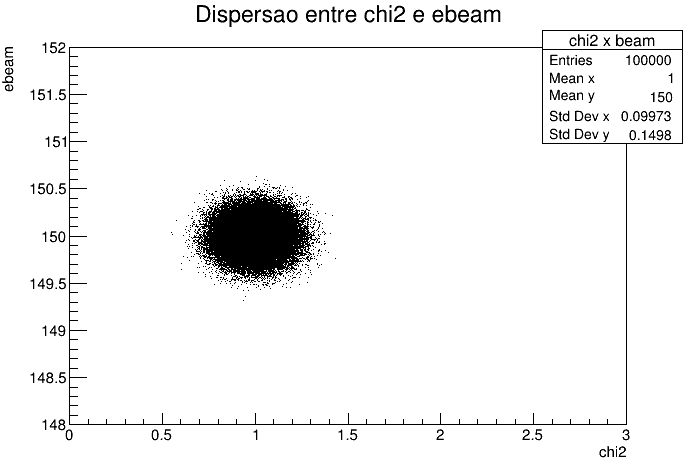

In [6]:
chi2ebeamHist = TH2F("chi2 x beam", "Dispersao entre chi2 e ebeam", 100, 0, 3, 100, 148., 152.)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    ebeam = mychain.ebeam
    chi2 = mychain.chi2
    chi2ebeamHist.Fill(chi2,ebeam)
    if nb <= 0:
        continue
        
canvas_chi2ebeam = TCanvas()
chi2ebeamHist.GetXaxis().SetTitle("chi2")
chi2ebeamHist.GetYaxis().SetTitle("ebeam")
chi2ebeamHist.Draw()
canvas_chi2ebeam.Draw()

# Exercíccio 5: Calculate $p_T = \sqrt{p_x^2 + p_y^2}$ in an analysis macro and make a histogram of the variable. Tip: pt = sqrt(px*px + py*py)

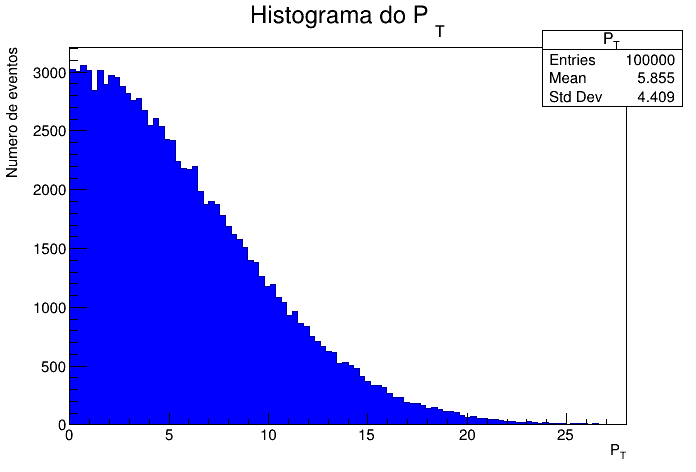

In [7]:
ptHist = TH1D("P_{T}","Histograma do P_{T}", 100, 0, 28)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    px = mychain.px
    py = mychain.py
    pt = ( px**2 + py**2 )**0.5
    ptHist.Fill(pt)
    if nb <= 0:
        continue
        
canvas_pt = TCanvas()
ptHist.GetXaxis().SetTitle("P_{T}")
ptHist.GetYaxis().SetTitle("Numero de eventos")
ptHist.SetFillColor(4)
ptHist.Draw()
canvas_pt.Draw()


# Exercício 6: Include a histogram of the quantity theta, or the angle that the beam makes with the z-axis, and is calculates by $\theta = arctan\left(\frac{p_T}{p_Z}\right)$. Tip: use this math function ROOT.TMath.ATan(y/x).

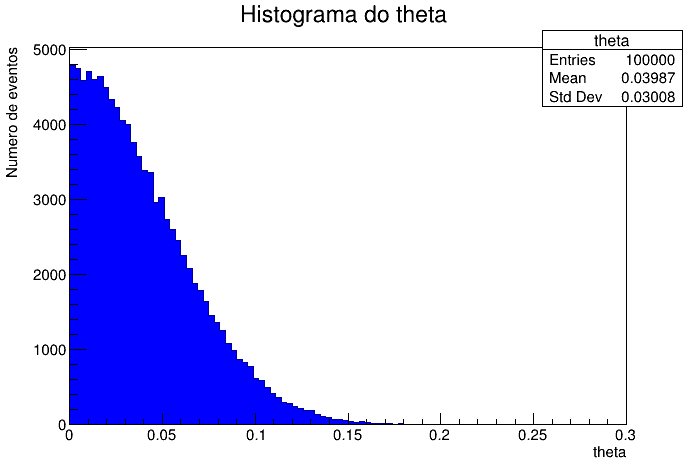

In [8]:
thetaHist = TH1D("theta","Histograma do theta ", 100, 0, 0.3)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    px = mychain.px
    py = mychain.py
    pz = mychain.pz
    pt = ( px**2 + py**2 )**0.5
    theta = ROOT.TMath.ATan(pt/pz)
    thetaHist.Fill(theta)
    if nb <= 0:
        continue

canvas_theta = TCanvas()
thetaHist.GetXaxis().SetTitle("theta")
thetaHist.GetYaxis().SetTitle("Numero de eventos")
thetaHist.SetFillColor(4)
thetaHist.Draw()
canvas_theta.Draw()

# Exercício 7: Apply a cut in your analysis macro. Your gooal is to count the number of events for which pz is less than 145 geV, and then display the value. Tip: include the following statement in your wrap-up section: print "The number of events with pz < 145 is", pzCount

O numero de eventos com pz < 145 : 14962.0


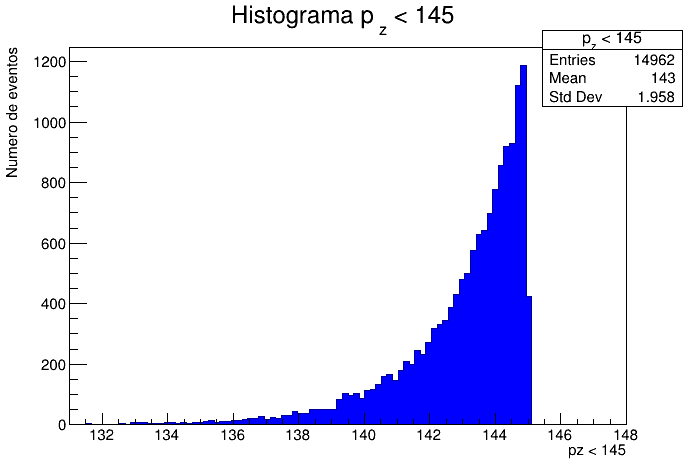

In [9]:
cortepz = TH1D("p_{z} < 145","Histograma p_{z} < 145 ", 100, 131, 148)

for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    pz = mychain.pz
    if pz < 145:
        cortepz.Fill(pz)
        
    if nb <= 0:
        continue

canvas_pzcount = TCanvas()
cortepz.GetXaxis().SetTitle("pz < 145")
cortepz.GetYaxis().SetTitle("Numero de eventos")
cortepz.SetFillColor(4)
cortepz.Draw()
canvas_pzcount.Draw()
print("O numero de eventos com pz < 145 :", cortepz.GetEntries()) 

# Exercício 8: Revise your code to write the histograms to a file.

In [10]:
file = ROOT.TFile("histogramas-jupyter.root","recreate")

chi2Hist.Write()
ebeamHistFIT.Write()
ebeamHist.Write()
chi2ebeamHist.Write()
ptHist.Write()
cortepz.Write()
file.Write()
file.Close()